In [1]:
# default_exp utils

In [24]:
#hide
from nbdev.showdoc import *
from fastcore.test import *
from pdb import set_trace

In [25]:
#export
from tifffile import imread
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import numpy as np

# Utils
> helper functions

In [26]:
#export
def tiff_imread(path):
    '''helper function to read tiff file with pathlib object or str'''
    if isinstance(path, str) : return imread(path)
    if isinstance(path, Path): return imread(str(path))
    
    
def hasattrs(o,attrs):
    "checks of o has several attrs"
    return all(hasattr(o,attr) for attr in attrs)
     

def show_image(im, ax=None, title=None, figsize=(4, 5), **kwargs,):
    'plots image from nump or tensor'
    if hasattrs(im, ('data','cpu','permute')):
        im = im.data.cpu()
        if im.shape[0]<5: im=im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): im=array(im)
    if im.shape[-1]==1: im=im[...,0]
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.axis('off')
    return ax

In [27]:
show_doc(tiff_imread)

<h4 id="tiff_imread" class="doc_header"><code>tiff_imread</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>tiff_imread</code>(**`path`**)

helper function to read tiff file with pathlib object or str

In [28]:
show_doc(hasattrs)

<h4 id="hasattrs" class="doc_header"><code>hasattrs</code><a href="__main__.py#L8" class="source_link" style="float:right">[source]</a></h4>

> <code>hasattrs</code>(**`o`**, **`attrs`**)

checks of o has several attrs

In [29]:
show_doc(show_image)

<h4 id="show_image" class="doc_header"><code>show_image</code><a href="__main__.py#L13" class="source_link" style="float:right">[source]</a></h4>

> <code>show_image</code>(**`im`**, **`ax`**=*`None`*, **`title`**=*`None`*, **`figsize`**=*`(4, 5)`*, **\*\*`kwargs`**)

plots image from nump or tensor

In [30]:
PATH = Path('/nrs/turaga/speisera/SMLM_2016/')
TRN_IMG_P  = PATH/'sequence-as-stack-MT0.N2.HD-AS-Exp.tif'

In [31]:
test_eq(type(tiff_imread(TRN_IMG_P)), np.ndarray)
test_eq(type(tiff_imread(str(TRN_IMG_P))), np.ndarray)
test_eq_type(tiff_imread(TRN_IMG_P), tiff_imread(str(TRN_IMG_P)))

In [32]:
TRN_IMG = tiff_imread(TRN_IMG_P)
TRN_IMG.shape

(2500, 64, 64)

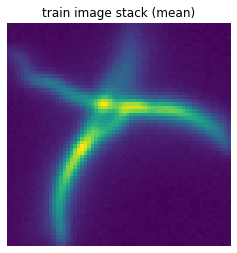

In [33]:
show_image(TRN_IMG.mean(0), title = 'train image stack (mean)');

In [35]:
#export
def tst_check_tensor(x):
    "cehcks if x is torch.Tensor"
    assert isinstance(x, torch.Tensor), f'must be torch.tensor not {type(x)}' 
    return

In [41]:
from nbdev.export import *
notebook2script()

Converted 00_models.ipynb.
Converted 01_simulation.ipynb.
Converted 02_samplers.ipynb.
Converted index.ipynb.
Converted utils.ipynb.
